In [9]:
import numpy as np, pandas as pd, random, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import clear_output
from PyProbs import Probability as pr

In [10]:
class passenger(object):
    def __init__(self):
        self.aisle = 0
        self.seat = 0
        self.speed = 99 - 50*pr.Prob(3/100)
        self.purse = pr.Prob(30/100)
        self.carry = pr.Prob(50/100)
        self.timer = 2
        self.first = 1
        self.action = 0
        self.board = 0

In [ ]:
#random
def create_passenger_list():
    p_list = []
    for i in range(33):
        p_list.append(passenger())
        p_list[i].aisle = i // 3 + 4
        p_list[i].seat = i % 3
    for i in range(84):
        # print(i//6 + 1)
        p_list.append(passenger())
        p_list[i + 33].aisle = i // 6 + 1
        p_list[i + 33].seat = i % 6 + 4
    for i in range(84):
        p_list.append(passenger())
        p_list[i + 33 + 84].aisle = i // 6 + 1
        p_list[i + 33 + 84].seat = i % 6 + 11
    for i in range(84):
        p_list.append(passenger())
        p_list[i + 33 + 84 + 84].aisle = i // 6 + 1
        p_list[i + 33 + 84 + 84].seat = i % 6 + 18
    for i in range(33):
        p_list.append(passenger())
        p_list[i + 33 + 84 + 84 + 84].aisle = i // 3 + 4
        p_list[i + 33 + 84 + 84 + 84].seat = i % 3 + 25
    random.shuffle(p_list)
    return p_list

In [16]:


def initialize_timer(p_list):
    for i in range(len(p_list)):
        p_list[i].timer += int(np.random.weibull(2)*(3*p_list[i].purse + 5*p_list[i].carry))
    return p_list

def initialize_array(wing):
    for i in range(4):
        for j in range(14):
            wing[i+28][j] = 12
    return wing

def next_column(wing, i):
    if wing[i][0] != 0:
        if wing[i+1][0] == 0 and wing[i][0].action == 0:
            if random.randrange(100) < wing[i][0].speed:
                wing[i+1][0] = wing[i][0]
                wing[i][0] = 0
    wing[i][0].action = 1
    return wing

def check_intersection(wing, i):
    if wing[0][i] != 0:
        if wing[0][i].seat < 7 and wing[0][i].action == 0 and wing[1][i] == 0:
            wing[1][i] = wing[0][4]
            wing[0][i] = 0
            wing[1][i].action = 1
        elif wing[0][i].seat >= 7 and wing[0][i].action ==0 and wing[0][i+1] == 0:
            wing[0][i+1] = wing[0][i]
            wing[0][i] = 0
            wing[0][i+1].action = 1
        else:
            wing[0][i].action = 1
    return wing

def update_column(wing, column, sit, seated):
    for i in range(1, 15):
            if wing[column][i] != 0:
                if wing[column][i].aisle != i:
                    if wing[column][i+1] == 0 and wing[column][i].action == 0:
                        if random.randrange(100) < wing[i][0].speed:
                            wing[i+1][0] = wing[i][0]
                            wing[i][0] = 0
                else:
                    if wing[column][i].first:
                        wing[column][i].first = 0
                        if column == 3:
                            wing[28][i] -= (wing[column][i].purse + 2*wing[column][i].carry)
                            if wing[28][i] < 0:
                                wing[column][i].timer += 5
                        elif column == 10:
                            wing[29][i] -= (wing[column][i].purse + 2*wing[column][i].carry)
                            if wing[29][i] < 0:
                                wing[column][i].timer += 5
                        elif column == 17:
                            wing[30][i] -= (wing[column][i].purse + 2*wing[column][i].carry)
                            if wing[30][i] < 0:
                                wing[column][i].timer += 5
                        elif column == 24:
                            wing[31][i] -= (wing[column][i].purse + 2*wing[column][i].carry)
                            if wing[31][i] < 0:
                                wing[column][i].timer += 5
                        wing[column][i] = check_seat(wing, column, i)
                        if wing[column][i].speed == 49:
                            wing[column][i].timer *= 2
                    if wing[column][i].timer != 0:
                        wing[column][i].timer -= 1
                    else:
                        wing[wing[column][i].seat][i] = wing[column][i]
                        seated.append(wing[column][i])
                        wing[column][i] = 0
                        sit += 1
    return wing, sit, seated

def check_aisle(wing, i, j):
    if wing[i][j].seat == j - 3:
        wing[i][j].timer += 5*wing[i][j-2] + 3*wing[i][j-1]
    if wing[i][j].seat == j + 3:
        wing[i][j].timer += 5*wing[i][j+2] + 3*wing[i][j+1]
    if wing[i][j].seat == j - 2:
        wing[i][j].timer += 3*wing[i][j-1]
    if wing[i][j].seat == j + 2:
        wing[i][j].timer += 3*wing[i][j+1]
    return wing[i][j]

def run_wing(wing, p_list):
    sit = 0
    time = 0
    seated = []
    while sit < 318:
        time += 1
        if wing[0][0] == 0 and len(pop_list) != 0:
            wing[0][0] = p_list.pop()
            wing[0][0].action = 1
            change = 1
        for i in range(3):
            wing = next_column(wing, i)
        wing = check_intersection(wing, 3)
        wing, sit, seated = update_column(wing, 3, sit, seated)
        for i in range(4, 10):
            wing = next_column(wing, i)
        wing = check_intersection(wing, 10)
        wing, sit, seated = update_column(wing, 10, sit, seated)
        for i in range(11, 17):
            wing = next_column(wing, i)
        wing = check_intersection(wing, 17)
        wing, sit, seated = update_column(wing, 17, sit, seated)
        for i in range(18, 24):
            wing = next_column(wing, i)
        wing = check_intersection(wing, 24)
        wing, sit, seated = update_column(wing, 24, sit, seated)

In [ ]:
p_list = create_passenger_list()
p_list = initialize_timer(p_list)
wing = [[0] * 32 for _ in range(15)]
wing = initialize_array(wing)

In [7]:
wing = [[0] * 32 for _ in range(15)]
print(wing[31])

IndexError: list index out of range

In [ ]:
        for i in range(1, 15):
            if wing[3][i] != 0:
                if wing[3][i].aisle != i:
                    if wing[3][i+1] == 0 and wing[3][i].action == 0:
                        if random.randrange(100) < wing[i][0].speed:
                            wing[i+1][0] = wing[i][0]
                            wing[i][0] = 0
                else:
                    if wing[3][i].first:
                        wing[3][i].first = 0
                        wing[28][i] -= (wing[3][i].purse + 2*wing[3][i].carry)
                        if wing[28][i] < 0:
                            wing[3][i].timer += 5
                        wing[3][i] = check_seat(wing, 3, i)
                        if wing[3][i].speed == 49:
                            wing[3][i].timer *= 2
                    if wing[3][i].timer != 0:
                        wing[3][i].timer -= 1
                    else:
                        wing[wing[3][i].seat][i] = wing[3][i]
                        seated.append(wing[3][i])
                        wing[3][i] = 0
                        sit += 1

In [ ]:
            if wing[i][0] != 0:
                if wing[i+1][0] == 0 and wing[i][0].action == 0:
                    if random.randrange(100) < wing[i][0].speed:
                        wing[i+1][0] = wing[i][0]
                        wing[i][0] = 0
            wing[i][0].action = 1

In [ ]:
if wing[0][3] != 0:
    if wing[0][3].seat < 7 and wing[0][3].action == 0 and wing[1][3] == 0:
        wing[1][3] = wing[0][4]
        wing[0][3] = 0
        wing[1][3].action = 1
    elif wing[0][3].seat >= 7 and wing[0][3].action ==0 and wing[0][4] == 0:
        wing[0][4] = wing[0][3]
        wing[0][3] = 0
        wing[0][4].action = 1
    else:
        wing[0][4].action = 1

In [32]:
p_list = []
p_list = create_passenger_list()
for i in range(len(p_list)):
    print(p_list[i].aisle)

4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
9
9
9
10
10
10
11
11
11
12
12
12
13
13
13
14
14
14
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
9
9
9
10
10
10
11
11
11
12
12
12
13
13
13
14
14
14


In [31]:
def create_passenger_list():
    p_list = []
    for i in range(33):
        p_list.append(passenger())
        p_list[i].aisle = i//3 + 4
        p_list[i].seat = i%3
    for i in range(84):
        #print(i//6 + 1)
        p_list.append(passenger())
        p_list[i+33].aisle = i//6 + 1
        p_list[i+33].seat = i%6 +4
    for i in range(84):
        p_list.append(passenger())
        p_list[i+33+84].aisle = i//6 + 1
        p_list[i+33+84].seat = i%6 + 11
    for i in range(84):
        p_list.append(passenger())
        p_list[i+33+84+84].aisle = i//6 + 1
        p_list[i+33+84+84].seat = i%6 + 18
    for i in range(33):
        p_list.append(passenger())
        p_list[i+33+84+84+84].aisle = i//3 + 4
        p_list[i+33+84+84+84].seat = i%3 + 25
    #random.shuffle(p_list)
    return p_list 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
  
# Using weibull() method
gfg = np.random.weibull(2, 5000)

#plt.hist(gfg, bins = 50, density = True)
#plt.show()

1.321511668605342


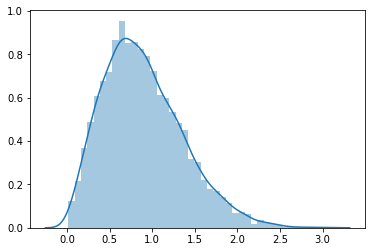

In [47]:
import seaborn as sns, numpy as np
gfg = np.random.weibull(2, 5000)
ax = sns.distplot(gfg)


In [48]:
#random
def create_passenger_list():
    p_list = []
    for i in range(33):
        p_list.append(passenger())
        p_list[i].aisle = i // 3 + 4
        p_list[i].seat = i % 3
    for i in range(84):
        # print(i//6 + 1)
        p_list.append(passenger())
        p_list[i + 33].aisle = i // 6 + 1
        p_list[i + 33].seat = i % 6 + 4
    for i in range(84):
        p_list.append(passenger())
        p_list[i + 33 + 84].aisle = i // 6 + 1
        p_list[i + 33 + 84].seat = i % 6 + 11
    for i in range(84):
        p_list.append(passenger())
        p_list[i + 33 + 84 + 84].aisle = i // 6 + 1
        p_list[i + 33 + 84 + 84].seat = i % 6 + 18
    for i in range(33):
        p_list.append(passenger())
        p_list[i + 33 + 84 + 84 + 84].aisle = i // 3 + 4
        p_list[i + 33 + 84 + 84 + 84].seat = i % 3 + 25
    random.shuffle(p_list)
    return p_list

In [73]:
#outside in

def create_passenger_column(seat, r, add, p_list):
    for i in range(r):
        p_list.append(passenger())
        if r == 14:
            p_list[i+add].aisle = i+1
        else:
            p_list[i+add].aisle = i+4
        p_list[i+add].seat = seat
    return p_list

def shuffle(add, step, p_list):
    temp = p_list[add:add+step]
    random.shuffle(temp)
    p_list[add:add+step] = temp
    return p_list

def create_side_section(center, p_list, sign, add):
    p_list = create_passenger_column(center-(sign*3), 14, add+0, p_list)
    p_list = create_passenger_column(center+(sign*3), 11, add+14, p_list)
    p_list = shuffle(add, 25, p_list)
    p_list = create_passenger_column(center-(sign*2), 14, add+25, p_list)
    p_list = create_passenger_column(center+(sign*2), 11, add+39, p_list)
    p_list = shuffle(add+25, 25, p_list)
    p_list = create_passenger_column(center-(sign*1), 14, add+50, p_list)
    p_list = create_passenger_column(center+(sign*1), 11, add+64, p_list)
    p_list = shuffle(add+50, 25, p_list)
    return p_list

def create_middle_section(center, p_list, add):
    p_list = create_passenger_column(center-(3), 14, add+0, p_list)
    p_list = create_passenger_column(center+(3), 14, add+14, p_list)
    p_list = shuffle(add, 28, p_list)
    p_list = create_passenger_column(center-(2), 14, add+28, p_list)
    p_list = create_passenger_column(center+(2), 14, add+42, p_list)
    p_list = shuffle(add+28, 28, p_list)
    p_list = create_passenger_column(center-(1), 14, add+56, p_list)
    p_list = create_passenger_column(center+(1), 14, add+70, p_list)
    p_list = shuffle(add+56, 28, p_list)
    return p_list
    

def create_passenger_list():
    p_list = []
    #right most
    p_list = create_side_section(24, p_list, 1, 0)
    p_list = create_side_section(3, p_list, -1, 75)
    p_list = create_middle_section(17, p_list, 150)
    p_list = create_middle_section(10, p_list, 234)
    p_list.reverse()
    return p_list

p_list = create_passenger_list()
for i in p_list:
    print(i.aisle, i.seat)
len(p_list)

14 11
13 11
12 11
11 11
10 11
9 11
8 11
7 11
6 11
5 11
4 11
3 11
2 11
1 11
14 9
13 9
12 9
11 9
10 9
9 9
8 9
7 9
6 9
5 9
4 9
3 9
2 9
1 9
13 12
5 12
12 12
1 8
6 8
12 8
1 12
10 12
8 12
14 12
8 8
9 8
10 8
13 8
4 12
7 8
4 8
7 12
2 8
2 12
3 12
3 8
9 12
6 12
14 8
5 8
11 12
11 8
9 13
8 7
3 13
10 7
11 13
13 13
13 7
8 13
14 7
10 13
2 13
4 7
1 13
14 13
6 7
4 13
11 7
9 7
5 13
2 7
5 7
7 7
1 7
6 13
12 7
12 13
7 13
3 7
14 18
13 18
12 18
11 18
10 18
9 18
8 18
7 18
6 18
5 18
4 18
3 18
2 18
1 18
14 16
13 16
12 16
11 16
10 16
9 16
8 16
7 16
6 16
5 16
4 16
3 16
2 16
1 16
7 15
4 15
10 19
5 19
7 19
14 15
6 15
11 19
10 15
13 19
9 15
4 19
12 15
11 15
3 15
12 19
6 19
14 19
8 19
9 19
1 19
3 19
8 15
13 15
2 15
2 19
5 15
1 15
14 14
13 14
13 20
3 20
9 14
8 14
1 20
10 14
6 14
8 20
5 20
10 20
14 20
1 14
5 14
2 14
11 20
9 20
7 20
4 20
7 14
11 14
6 20
12 20
12 14
4 14
3 14
2 20
1 4
13 2
7 2
14 4
2 4
7 4
10 2
6 2
14 2
8 4
10 4
12 4
6 4
5 4
12 2
4 2
3 4
4 4
11 4
11 2
8 2
9 4
5 2
9 2
13 4
11 1
8 5
14 5
1 5
2 5
13 5
10 5


318

In [101]:
#section
def shuffle(add, step, p_list):
    temp = p_list[add:add+step]
    random.shuffle(temp)
    p_list[add:add+step] = temp
    return p_list
def create_section(p_list, aisle, pos, add):
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+j].aisle = aisle-i-1
            p_list[2*i+add+j].seat = pos-j
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+j+6].aisle = aisle+i+1
            p_list[2*i+add+j+6].seat = pos-j
    #p_list = shuffle(add, 12, p_list)
    return p_list

def create_section_row(p_list, pos, add):
    p_list = create_section(p_list, 24, pos, add)
    p_list = create_section(p_list, 17, pos, add+12)
    p_list = create_section(p_list, 10, pos, add+24)
    p_list = create_section(p_list, 3, pos, add+36)
    return p_list

def create_sub_section(p_list, aisle, pos, sign, add):
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+j].aisle = aisle+(sign*(-i-1))
            p_list[2*i+add+j].seat = pos-j
    for i in range(3):
        p_list.append(passenger())
        p_list[add+6+i].aisle = aisle-(sign*(-i-1))
        p_list[add+6+i].seat = pos
    #p_list = shuffle(add, 9, p_list)
    return p_list

def create_mini_section(p_list, aisle, pos, sign, add):
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+j].aisle = aisle+(sign*(-i-1))
            p_list[2*i+add+j].seat = pos-j
    #p_list = shuffle(add, 6, p_list)
    return p_list

def create_passenger_list():
    p_list = []
    p_list = create_section_row(p_list, 14, 0)
    p_list = create_section_row(p_list, 12, 48)
    p_list = create_section_row(p_list, 10, 96)
    p_list = create_section_row(p_list, 8, 144)
    p_list = create_section_row(p_list, 6, 192)
    p_list = create_sub_section(p_list, 24, 4, 1, 240)
    p_list = create_section(p_list, 17, 4, 249)
    p_list = create_section(p_list, 10, 4, 261)
    p_list = create_sub_section(p_list, 3, 4, -1, 273)
    p_list = create_mini_section(p_list, 24, 2, 1, 282)
    p_list = create_section(p_list, 17, 2, 288)
    p_list = create_section(p_list, 10, 2, 300)
    p_list = create_mini_section(p_list, 3, 2, -1, 312)
    return p_list

p_list = create_passenger_list()
for i in p_list:
    print(i.aisle, i.seat)
len(p_list)

21 14
25 13
23 14
22 13
21 13
22 14
25 14
26 13
27 14
26 14
27 13
23 13
20 14
14 14
16 13
19 14
18 13
15 14
14 13
20 13
16 14
19 13
15 13
18 14
13 13
8 13
11 14
9 13
7 14
12 14
11 13
12 13
9 14
13 14
8 14
7 13
2 14
6 14
1 14
1 13
2 13
5 14
4 13
0 13
6 13
5 13
4 14
0 14
22 11
22 12
26 12
27 12
21 12
25 12
23 12
26 11
21 11
23 11
27 11
25 11
20 11
15 11
18 11
19 12
18 12
16 11
14 11
19 11
20 12
15 12
16 12
14 12
7 11
11 11
8 12
13 11
9 12
8 11
12 12
7 12
12 11
11 12
9 11
13 12
2 12
5 11
4 11
1 12
5 12
6 11
0 12
4 12
1 11
6 12
0 11
2 11
26 9
25 9
22 9
21 9
27 9
27 10
25 10
22 10
21 10
26 10
23 9
23 10
14 9
20 10
16 10
14 10
20 9
19 9
15 10
15 9
19 10
18 10
18 9
16 9
7 10
11 10
8 9
12 9
13 10
9 10
12 10
8 10
7 9
13 9
9 9
11 9
4 10
1 9
6 10
5 10
2 9
1 10
2 10
4 9
5 9
6 9
0 10
0 9
25 7
21 7
21 8
26 8
23 8
26 7
23 7
25 8
27 8
27 7
22 8
22 7
15 7
18 7
14 7
18 8
20 7
19 8
14 8
19 7
16 7
20 8
15 8
16 8
9 8
13 7
11 7
7 7
12 7
8 7
13 8
11 8
9 7
12 8
8 8
7 8
2 8
4 7
5 7
4 8
0 7
1 8
1 7
5 8
2 7
6 8


318

In [ ]:
def create_sub_section(p_list, aisle, pos, sign, add):
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+12+j].aisle = aisle+(sign*(-i-1))
            p_list[2*i+add+12+j].seat = pos-j-2
    for i in range(3):
        p_list.append(passenger())
        p_list[add+18+i].aisle = aisle-(sign*(-i-1))
        p_list[add+18+i].seat = pos-2
    p_list = shuffle(add+12, 9, p_list)
    for i in range(3):
        for j in range(2):
            p_list.append(passenger())
            p_list[2*i+add+21+j].aisle = aisle+(sign*(-i-1))
            p_list[2*i+add+21+j].seat = pos-j-4
    p_list = shuffle(add+21, 6, p_list)
    return p_list

